In [53]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [29]:
df_header =["age",
"workclass",
"fnlwgt",
"education",
"education-num",
"marital-status",
"occupation",
"relationship",
"race",
"sex",
"capital-gain",
"capital-loss",
"hours-per-week",
"native-country",
">50K"]

In [30]:
df = pd.read_csv('adult.csv', header=None, names= df_header, index_col=False)

In [31]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       '>50K'],
      dtype='object')

<AxesSubplot:>

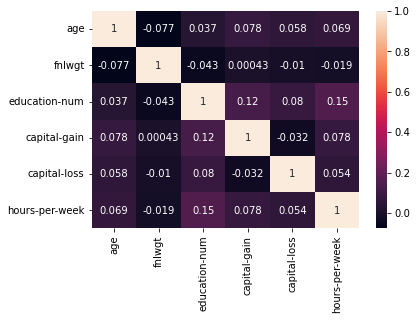

In [39]:
sns.heatmap(df.corr(),annot=True)

1- Find categorical data and transform to one hotencoder
2- Train and test split 
3 - train data 
4 - Scores/ Performance on slices of data 


In [32]:
df.select_dtypes(include='object')

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,>50K
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,United-States,<=50K
32557,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,United-States,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,United-States,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,United-States,<=50K


In [33]:
my_object_df =df.select_dtypes(include= 'object')
my_numeric_df =df.select_dtypes(exclude= 'object')

In [34]:
df_dummies = pd.get_dummies(my_object_df, drop_first = True)

In [35]:
final_df = pd.concat([my_numeric_df , df_dummies], axis=1)

In [36]:
final_df

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia,>50K_>50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,257302,12,0,0,38,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32557,40,154374,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
32558,58,151910,9,0,0,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
32559,22,201490,9,0,0,20,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [62]:
final_df.isnull().sum().sum()

0

In [41]:
X = final_df.drop(">50K_>50K",axis=1)
y = final_df[">50K_>50K"]


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [48]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [51]:
# Penalty Type
penalty = ['l1', 'l2']

# Use logarithmically spaced C values (recommended in official docs)
C = np.logspace(0, 4, 10)

In [52]:
grid_model = GridSearchCV(log_model,param_grid={'C':C,'penalty':penalty})
grid_model.fit(scaled_X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']})

In [54]:
grid_model.best_params_

{'C': 1.0, 'penalty': 'l1'}

In [55]:
y_pred = grid_model.predict(scaled_X_test)

In [56]:
accuracy_score(y_test,y_pred)

0.8548089915243827

In [57]:
confusion_matrix(y_test,y_pred)

array([[5802,  420],
       [ 762, 1157]])

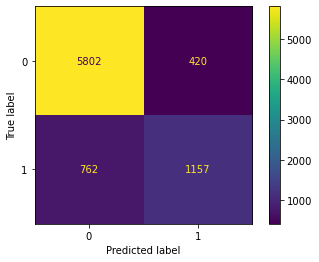

In [58]:
plot_confusion_matrix(grid_model,scaled_X_test,y_test)